In [1]:
library(Seurat)
library(ggplot2)
library(stringr)
library(ggpubr)
library(viridis)
library(dplyr)
library(reshape2)
library(ggbeeswarm)
library(ggrastr)
library(RColorBrewer)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.1 but the current version is
4.3.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [18]:
Axis_themes <- theme(plot.title = element_text(size = 8,hjust=0.5),
                     axis.title = element_text(size = 8),
                     axis.text = element_text(size = 8,color='black'),
                     axis.text.x = element_text(size = 8),                     
                     legend.text = element_text(size = 8),
                     legend.title = element_text(size = 8),
                     strip.text.x = element_text(size = 8),
                     strip.background = element_rect(fill=NA,linewidth=.355),
                     axis.line = element_line(linewidth = .355),
                     axis.ticks = element_line(linewidth = .177))
UMAP_theme <- theme_bw()+theme(axis.text.y = element_blank(),
                               axis.text.x = element_blank(),
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,linewidth=.355),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

In [2]:
jz.checkgenes = function(srat,gene){
    genes = rownames(srat)
    return(genes[startsWith(genes,gene)])
}

In [3]:
jz.save.umap.coord <- function(object) {
    # saves the UMAP embedding to the metadata 
    umapCoord <- as.data.frame(Embeddings(object = object[["umap"]]))
    object@meta.data$UMAP1 = umapCoord$umap_1
    object@meta.data$UMAP2 = umapCoord$umap_2
    if ('UMAP_1' %in% colnames(umapCoord)) {
        object@meta.data$UMAP1 = umapCoord$UMAP_1
        object@meta.data$UMAP2 = umapCoord$UMAP_2        
    }
    return(object)
}

In [ ]:
# build seurat

In [22]:
samples = list.files('Gene Expression and Antibody Capture/')

In [23]:
for (curr.sample in samples) {
    gex.dir = paste0('Gene Expression and Antibody Capture/',curr.sample)
    temp.mtx = Read10X(data.dir = gex.dir)
    temp.gex = CreateSeuratObject(counts = temp.mtx$`Gene Expression`,project= curr.sample)
    # add sample name before cell id
    temp.gex$cell_id = paste(curr.sample,rownames(temp.gex@meta.data),sep='_')
    
    if (curr.sample == samples[1]) {
        gex = temp.gex
    } else if (curr.sample == samples[2]) {
        out.gex = temp.gex
    } else {
        out.gex = c(out.gex,temp.gex)
    }
}

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains mo

In [24]:
gex.all = merge(gex, y=out.gex, add.cell.ids = samples)

In [25]:
gex.all

An object of class Seurat 
33694 features across 65607 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 36 layers present: counts.R125, counts.R3, counts.R478910, counts.R6, counts.S116, counts.S130, counts.S144, counts.S155, counts.S166, counts.S171, counts.S20, counts.S201, counts.S210, counts.S210V2, counts.S214, counts.S218, counts.S24, counts.S266, counts.S266V2, counts.S272, counts.S281, counts.S305, counts.S33, counts.S356, counts.S356V2, counts.S376, counts.S407, counts.S407V2, counts.S48, counts.S50, counts.S537, counts.S564, counts.S586, counts.S609, counts.S65, counts.S92

In [26]:
head(gex.all@meta.data) 

,orig.ident,nCount_RNA,nFeature_RNA,cell_id
,<chr>,<dbl>,<int>,<chr>
R125_AAACGGGCATGCTGGC-1,R125,722,293,R125_AAACGGGCATGCTGGC-1
R125_AAACGGGTCTCAACTT-1,R125,2201,981,R125_AAACGGGTCTCAACTT-1
R125_AAAGATGTCTCTTGAT-1,R125,20877,1838,R125_AAAGATGTCTCTTGAT-1
R125_AAAGCAACAATCCGAT-1,R125,2996,1027,R125_AAAGCAACAATCCGAT-1
R125_AAAGCAACACCGTTGG-1,R125,11255,2703,R125_AAAGCAACACCGTTGG-1
R125_AAAGCAACAGCGTTCG-1,R125,4354,1387,R125_AAAGCAACAGCGTTCG-1


In [27]:
gex.all[["percent.mt"]] <- PercentageFeatureSet(gex.all, pattern = "^MT-")


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


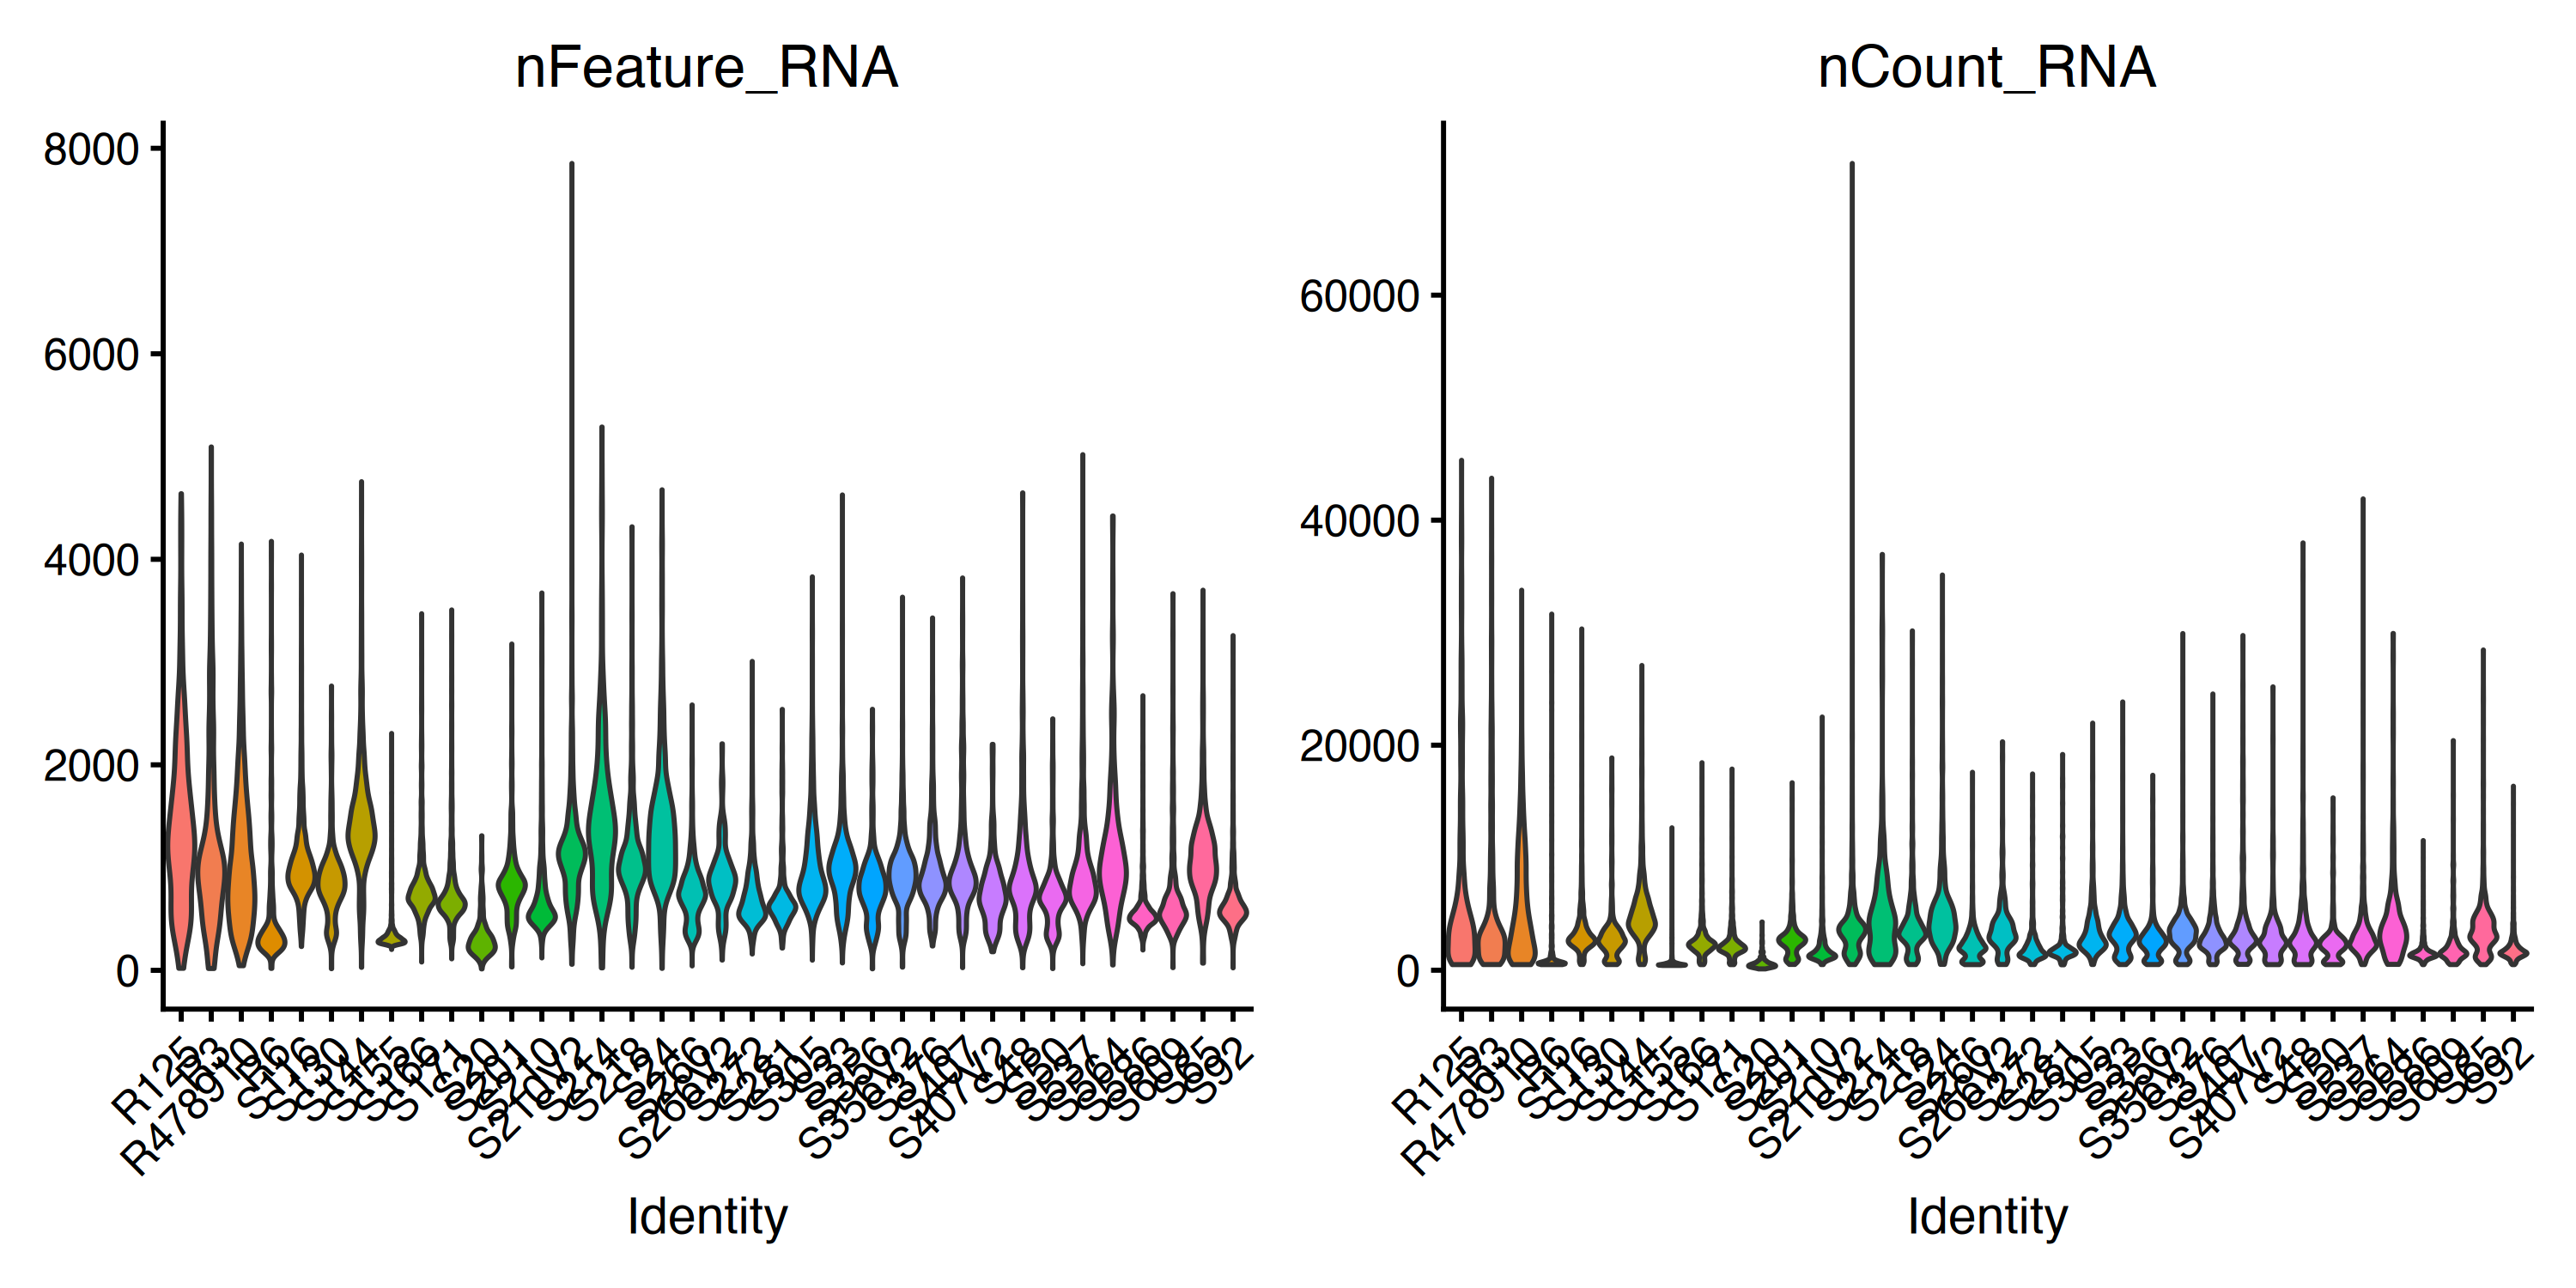

In [31]:
options(repr.plot.width=10,repr.plot.height=5)
VlnPlot(gex.all, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2,pt.size=0)

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


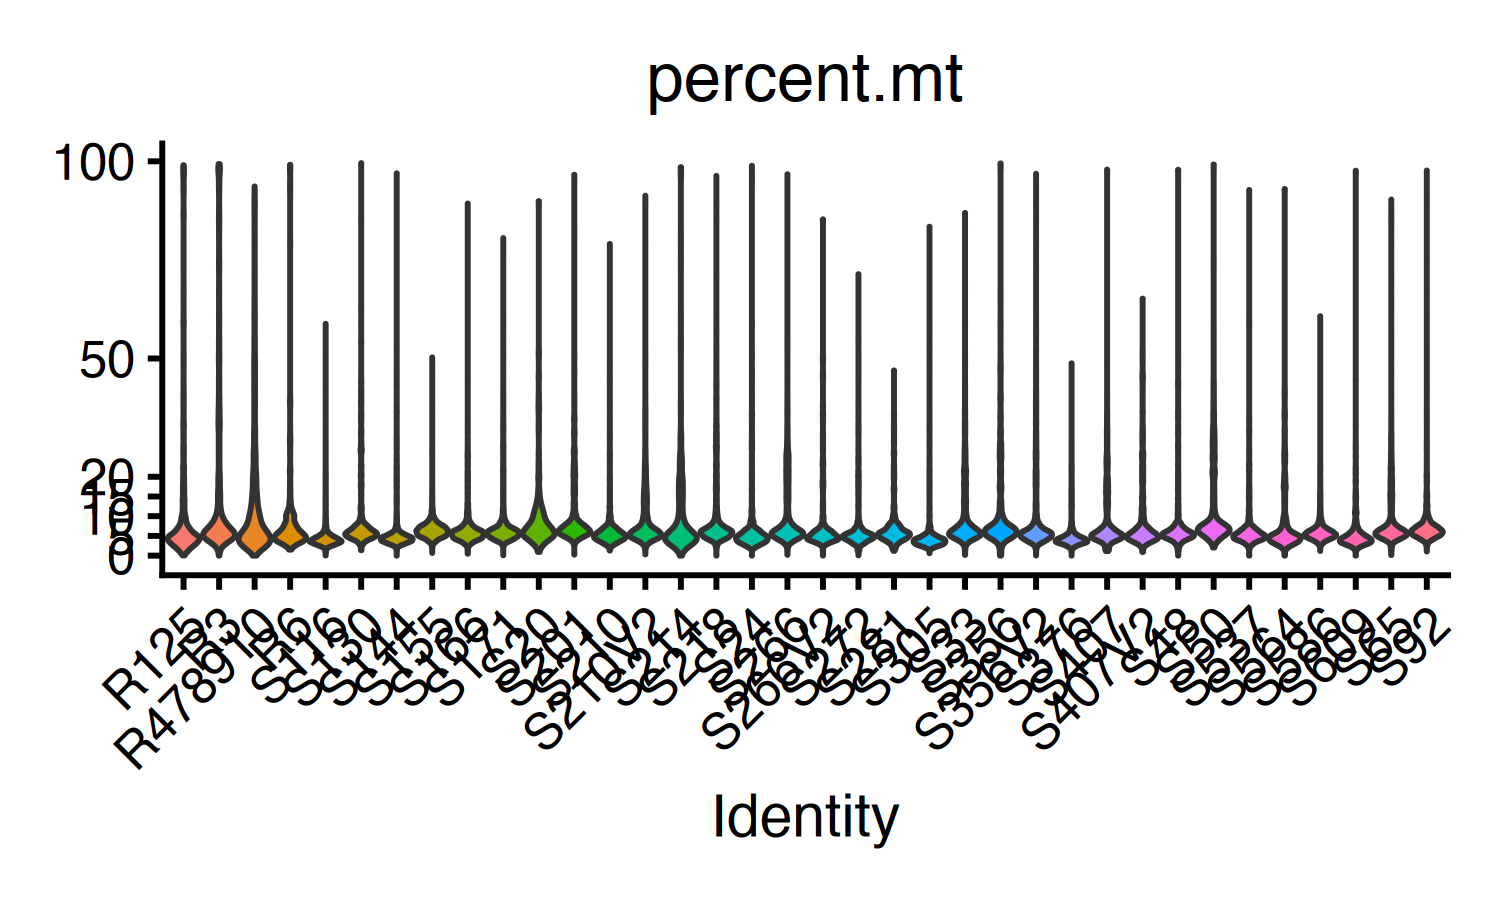

In [35]:
options(repr.plot.width=5,repr.plot.height=3)
VlnPlot(gex.all, features = c("percent.mt"),pt.size=0) + NoLegend() +
scale_y_continuous(breaks=c(0,5,10,15,20,50,100))


In [44]:
# in the paper they used 200, 2500, and 10%
gex <- subset(gex.all, subset = nFeature_RNA > 300 & percent.mt < 10 & nFeature_RNA<2500)
gex

An object of class Seurat 
33694 features across 53433 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 36 layers present: counts.R125, counts.R3, counts.R478910, counts.R6, counts.S116, counts.S130, counts.S144, counts.S155, counts.S166, counts.S171, counts.S20, counts.S201, counts.S210, counts.S210V2, counts.S214, counts.S218, counts.S24, counts.S266, counts.S266V2, counts.S272, counts.S281, counts.S305, counts.S33, counts.S356, counts.S356V2, counts.S376, counts.S407, counts.S407V2, counts.S48, counts.S50, counts.S537, counts.S564, counts.S586, counts.S609, counts.S65, counts.S92

In [ ]:
gex <- NormalizeData(gex,verbose = FALSE)
gex <- FindVariableFeatures(gex, selection.method = "vst", nfeatures = 2000, verbose = FALSE)
gex <- ScaleData(gex, verbose = FALSE)
gex <- RunPCA(gex, verbose = FALSE)
gex <- FindNeighbors(gex, dims = 1:15, verbose = FALSE)
gex <- FindClusters(gex, resolution = c(0.1,0.3,0.5,0.6), verbose = FALSE)
gex <- RunUMAP(gex, dims = 1:15, verbose = FALSE)
gex = jz.save.umap.coord(gex)

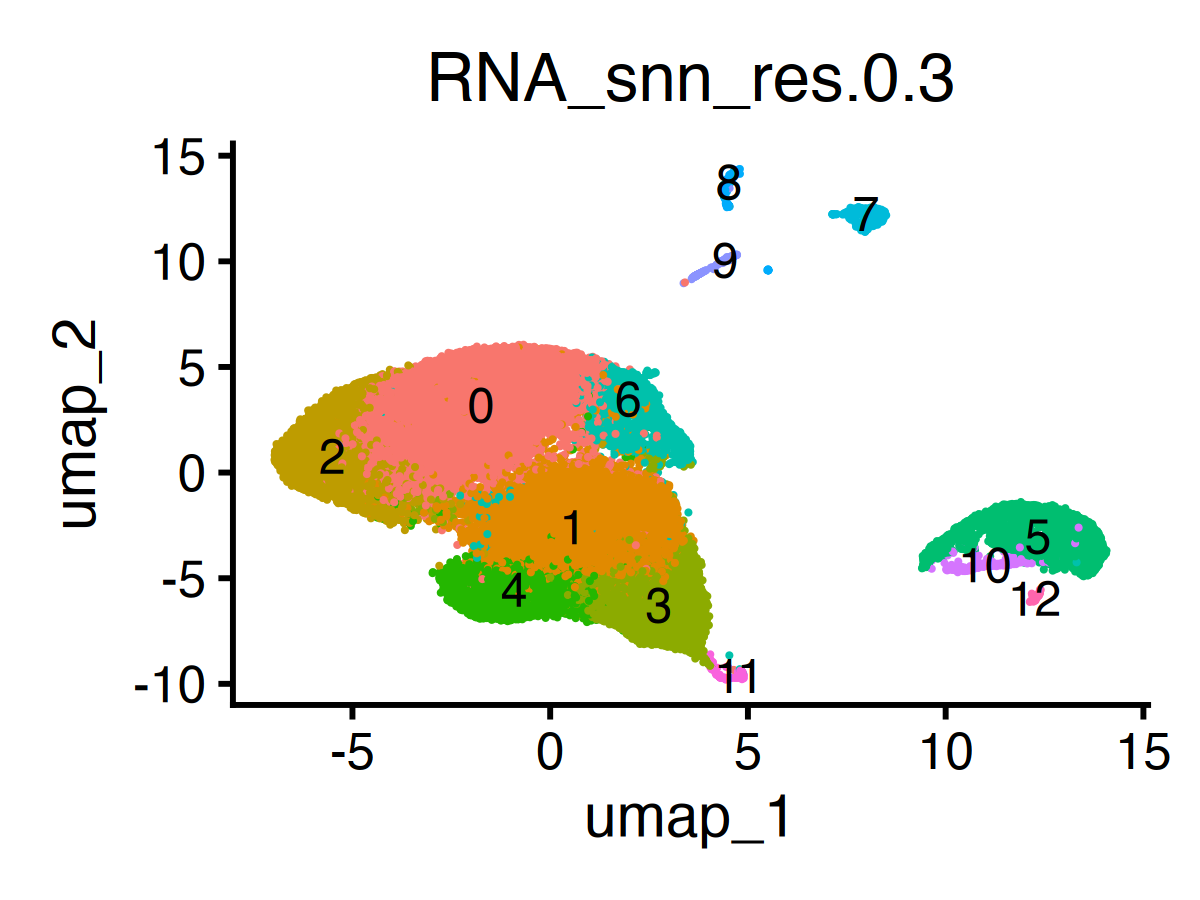

In [65]:
options(repr.plot.width=4,repr.plot.height=3)
DimPlot(gex,group.by='RNA_snn_res.0.3',label=TRUE) + NoLegend() 

In [88]:
gex$cell.type = as.character(gex$RNA_snn_res.0.3)
gex$cell.type[gex$cell.type %in% c(0,2,4)] = 'Naive-like'
gex$cell.type[gex$cell.type %in% c(1,3,6,11)] = 'MBC-like'
gex$cell.type[gex$cell.type %in% c(5,10,12)] = 'PB'
gex$cell.type[gex$cell.type %in% c(7,8,9)] = 'Non-B cell'

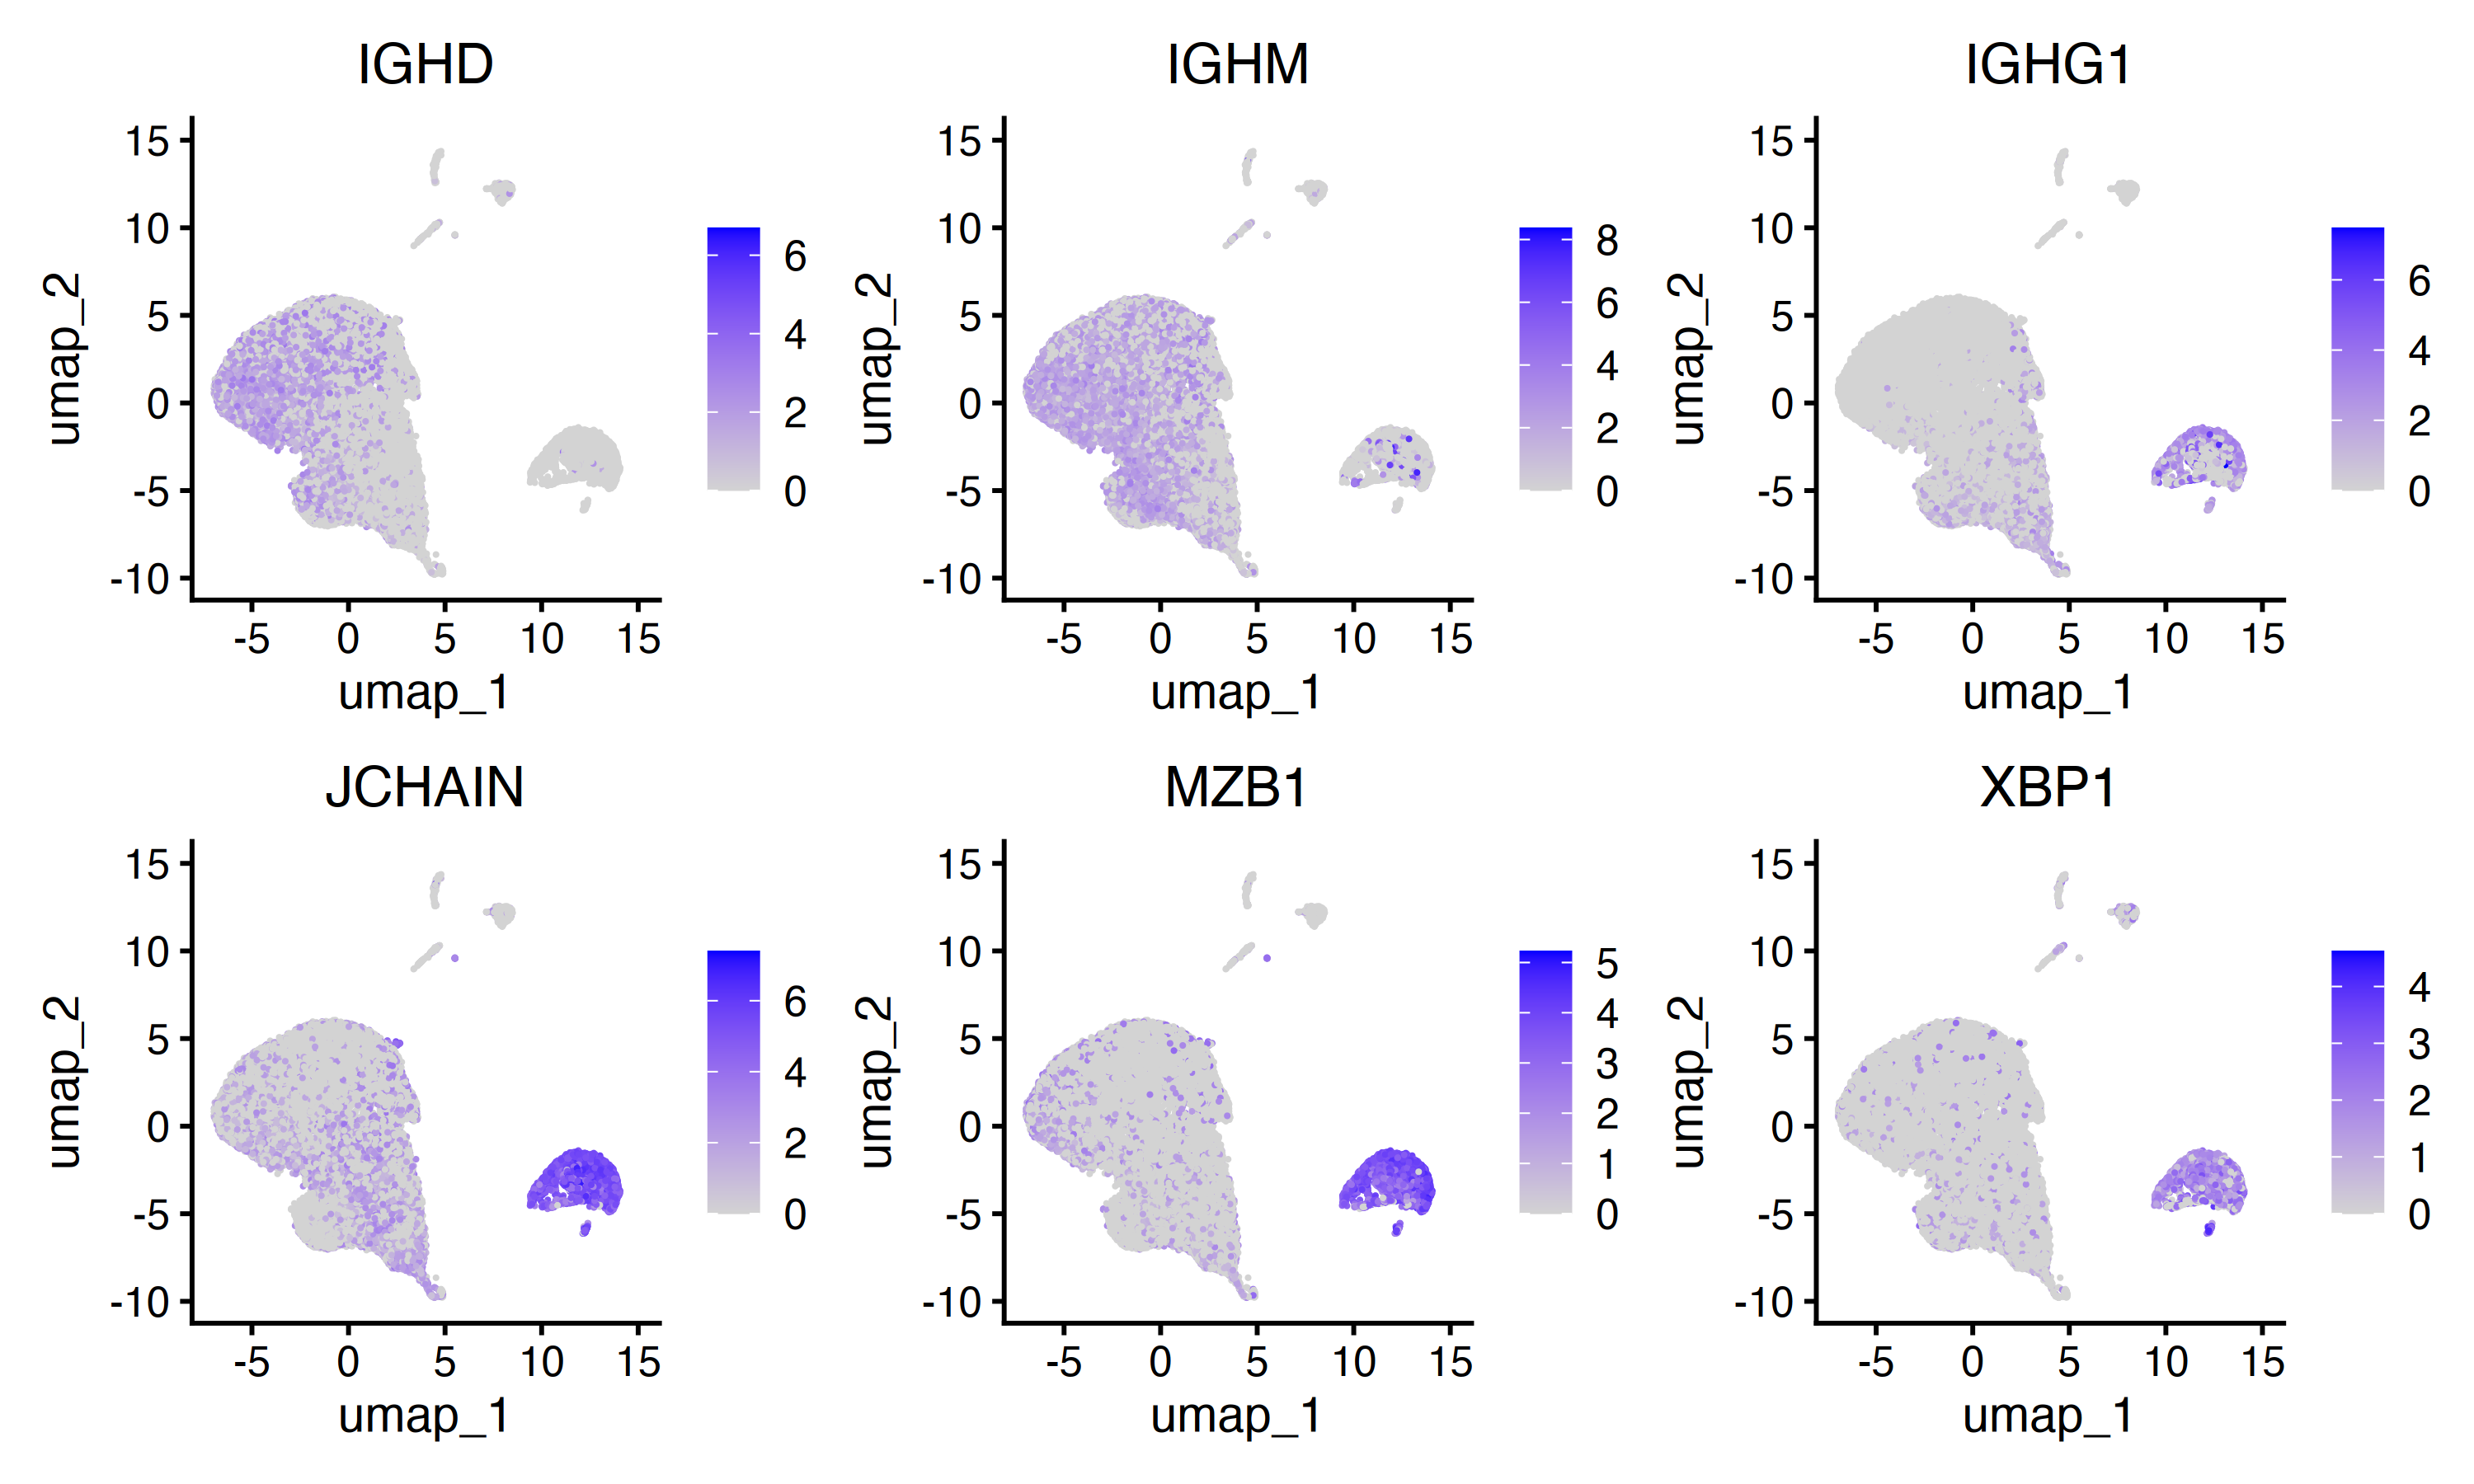

In [60]:
options(repr.plot.width=10,repr.plot.height=6)
FeaturePlot(gex,c('IGHD','IGHM','IGHG1','JCHAIN','MZB1','XBP1'),ncol=3)

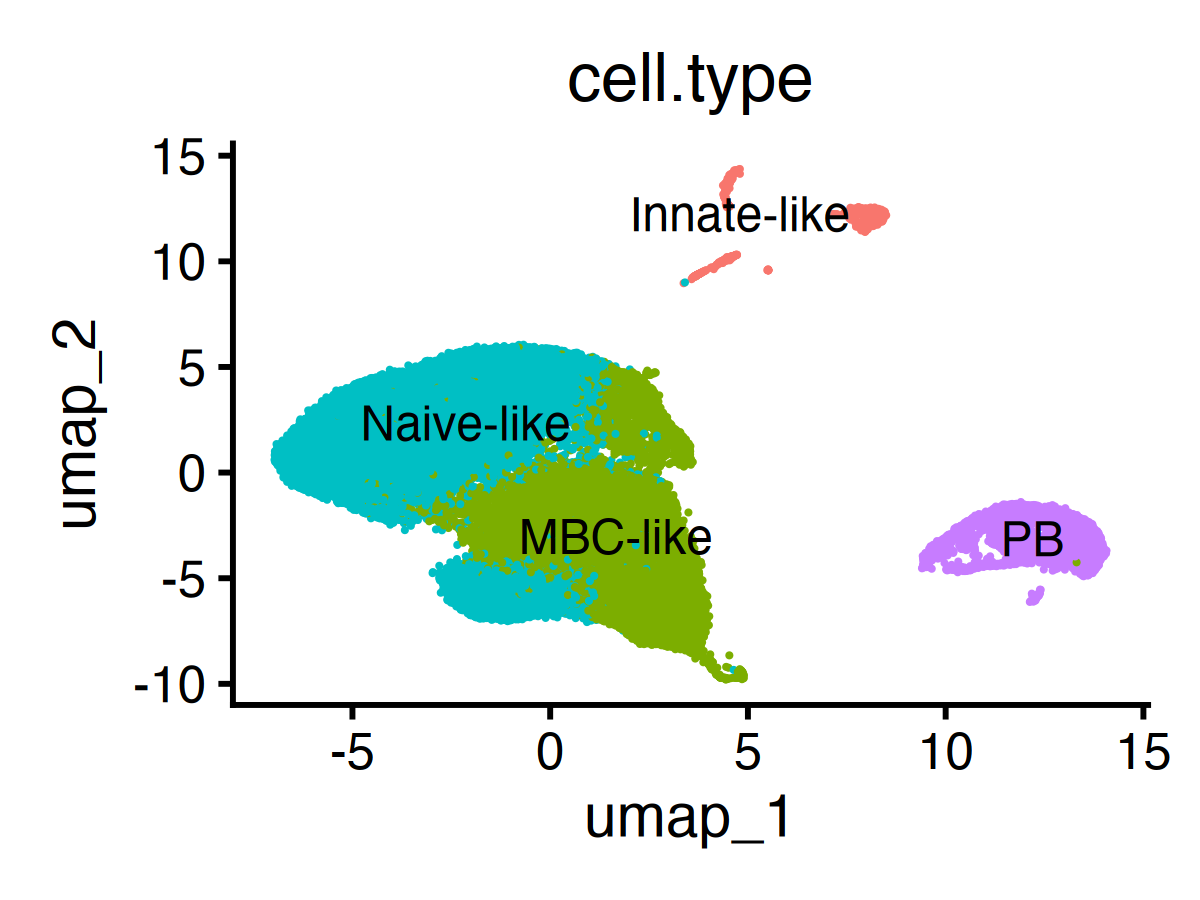

In [63]:
options(repr.plot.width=4,repr.plot.height=3)
DimPlot(gex,group.by='cell.type',label=TRUE) + NoLegend() 

In [18]:
# Read in the BCRs 
samples = list.files('BCR/')
for (curr.sample in samples) {
    bcr.dir = paste0('BCR/',curr.sample,'/filtered_contig_annotations.csv')
    temp.df = read.csv(bcr.dir)
    temp.df$cell_id = paste(curr.sample,temp.df$barcode, sep='_')
    if (curr.sample == samples[1]) {
        out.df = temp.df
    } else {
        out.df = rbind(out.df,temp.df)
    }
}

In [20]:
write.csv(out.df,'Dungan_etal_BCR_combined.csv')

In [21]:
head(out.df, 2)

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id,cell_id
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,AAACGGGGTCCATCCT-1,True,AAACGGGGTCCATCCT-1_contig_1,True,306,IGH,None,None,IGHJ5,IGHA1,False,None,None,None,27,5,clonotype4,None,R125_AAACGGGGTCCATCCT-1
2,AAACGGGGTCCATCCT-1,True,AAACGGGGTCCATCCT-1_contig_2,True,552,IGK,IGKV1D-39,None,IGKJ4,IGKC,True,True,CQESFANPFTF,TGTCAAGAGAGTTTCGCTAACCCTTTCACTTTC,340,65,clonotype4,clonotype4_consensus_1,R125_AAACGGGGTCCATCCT-1


In [4]:
out.df = read.csv('Dungan_etal_BCR_combined.csv',row.names=1)

In [5]:
# filter BCRs 
dim(out.df)
bcr = out.df %>% filter(is_cell=='True',high_confidence =='True',full_length=='True',productive=='True', cdr3!='None',reads>10)
dim(bcr)

[1] 147974     19

[1] 107424     19

In [6]:
table(bcr$chain)


  IGH   IGK   IGL Multi 
46261 40093 21061     9 

In [9]:
# keep cells with 1 heavy chain and/or 1 light chain 
pairing = bcr %>% count(cell_id,chain) %>% group_by(cell_id) %>% 
summarise(pair=paste(chain,collapse='+'),n=sum(n)) 
keep = pairing %>% filter(n<=2, pair %in% c('IGH','IGK','IGL','IGH+IGK','IGH+IGL'))


In [67]:
# add vdj info to seurat object 
gex$recovery = keep$pair[match(gex$cell_id,keep$cell_id)]
gex$recovery[is.na(gex$recovery)] = 'None'

In [39]:
table(gex$orig.ident,gex$recovery)

         
           IGH IGH+IGK IGH+IGL  IGK  IGL None
  R125       8     164      88  264   88  632
  R3         7     354     149   64   18  332
  R478910    1    2696     181    7    7  861
  R6         3     179      71   12   25   47
  S116      80    2037     789  230   85  629
  S130      14     294     179  302  108   86
  S144      37    1360     672   98   39  366
  S155       2     110      44    7    2 2132
  S166      66    1440     551  227   96  349
  S171      68    1212     457   80   46  355
  S20       30      15       9    3    1   63
  S201      18     554     275   43   32  130
  S210      23     462     261  474  231  195
  S210V2     0       0       0    0    0 2248
  S214      12     135      90    5    5   82
  S218      18     557     324   68   37  192
  S24       37     788     510  116   65  168
  S266      35     630     359  286  170  178
  S266V2     0       0       0    0    0  367
  S272      53     402     251  383  183  190
  S281      19     150  

In [89]:
saveRDS(gex,'Dugan_etal_combined_300.RDS')

In [117]:
gex = readRDS('Dugan_etal_combined_300.RDS')
gex

An object of class Seurat 
33694 features across 53433 samples within 1 assay 
Active assay: RNA (33694 features, 2000 variable features)
 73 layers present: counts.R125, counts.R3, counts.R478910, counts.R6, counts.S116, counts.S130, counts.S144, counts.S155, counts.S166, counts.S171, counts.S20, counts.S201, counts.S210, counts.S210V2, counts.S214, counts.S218, counts.S24, counts.S266, counts.S266V2, counts.S272, counts.S281, counts.S305, counts.S33, counts.S356, counts.S356V2, counts.S376, counts.S407, counts.S407V2, counts.S48, counts.S50, counts.S537, counts.S564, counts.S586, counts.S609, counts.S65, counts.S92, data.R125, data.R3, data.R478910, data.R6, data.S116, data.S130, data.S144, data.S155, data.S166, data.S171, data.S20, data.S201, data.S210, data.S210V2, data.S214, data.S218, data.S24, data.S266, data.S266V2, data.S272, data.S281, data.S305, data.S33, data.S356, data.S356V2, data.S376, data.S407, data.S407V2, data.S48, data.S50, data.S537, data.S564, data.S586, data.S609

In [103]:
metadata = gex@meta.data %>% mutate(none = ifelse(recovery=='None',1,0),
                               heavy = ifelse(grepl(pattern = 'IGH',recovery),1,0), 
                               light = ifelse(grepl(pattern = 'IGK|IGL',recovery),1,0),
                               paired = ifelse(grepl(pattern = '\\+',recovery),1,0)
                              )
metadata$recovery[nchar(metadata$recovery)>4] = 'Paired'
metadata$recovery[metadata$recovery %in% c('IGK','IGL')] = 'Light chain only'
metadata$recovery[metadata$recovery %in% c('IGH')] = 'Heavy chain only'
metadata$recovery = factor(metadata$recovery,levels=c('None','Heavy chain only','Light chain only','Paired'))

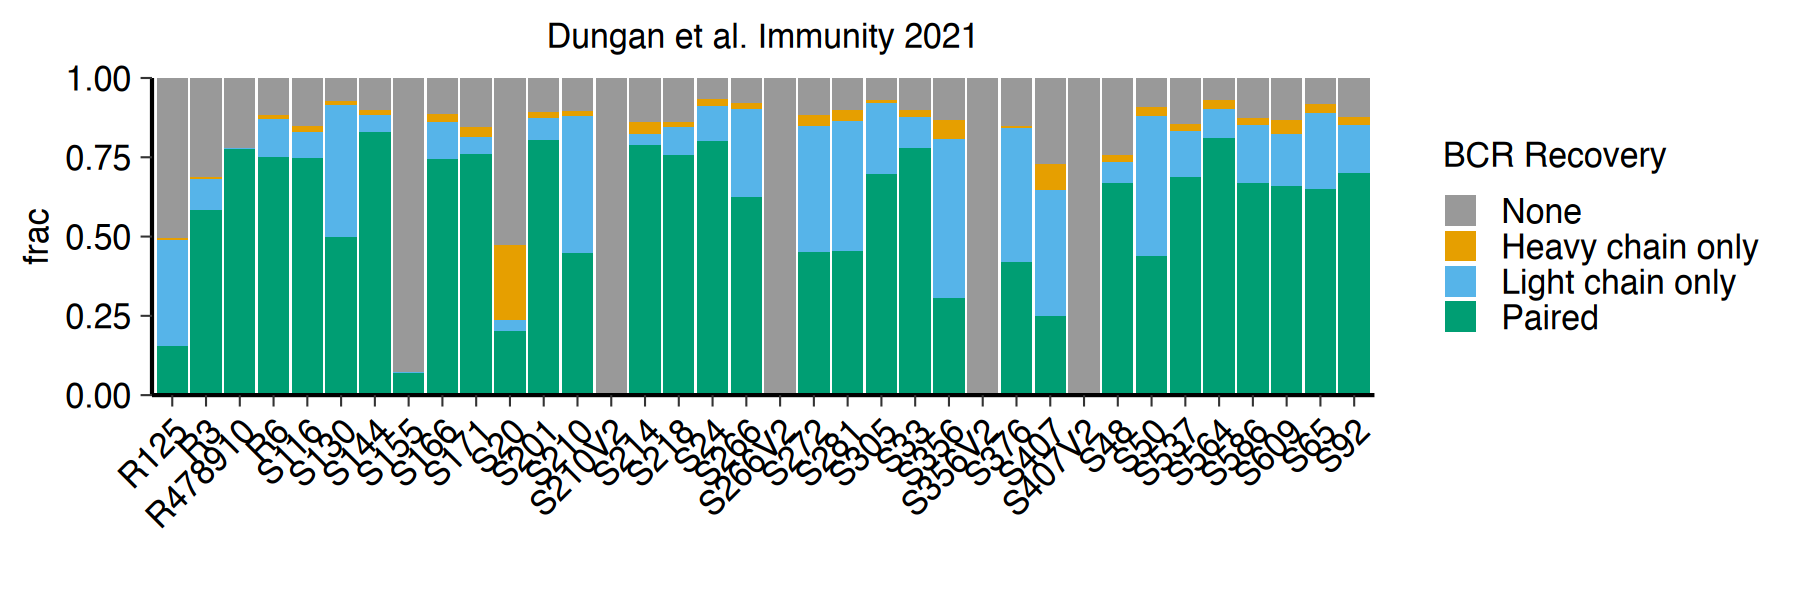

In [77]:
options(repr.plot.width=6,repr.plot.height=2,repr.plot.res=300)
metadata %>% 
ggplot(aes(x=orig.ident, fill=recovery)) + theme_classic()+
geom_bar(position='fill') + 
labs(x='',y='frac',fill='BCR Recovery',title='Dungan et al. Immunity 2021')+
scale_y_continuous(expand=c(0,0))+
scale_fill_manual(values = c("#999999", "#E69F00", "#56B4E9", "#009E73")) +
Axis_themes+
theme(axis.text.x=element_text(angle=45,hjust=1),
      legend.key.size = unit(.3, 'cm'))

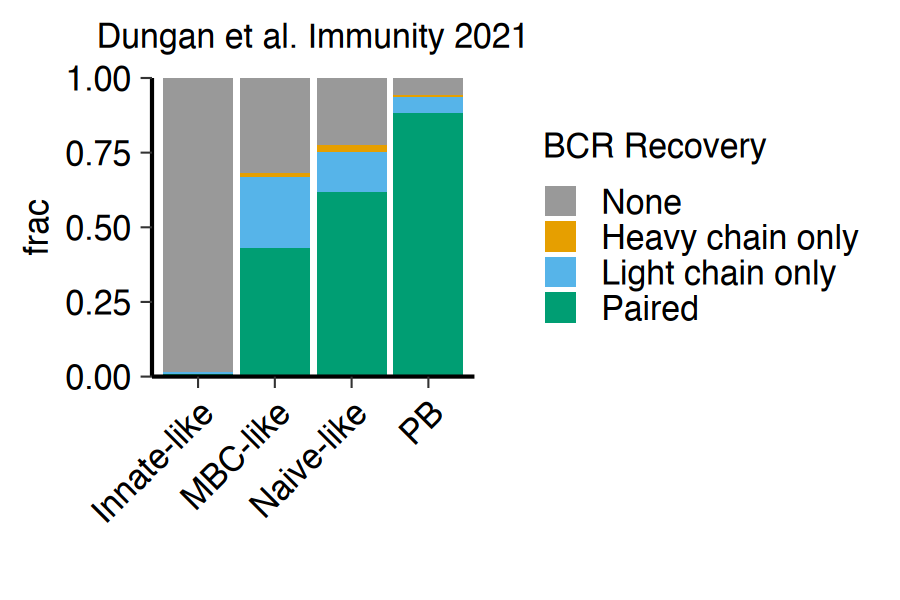

In [78]:
options(repr.plot.width=3,repr.plot.height=2,repr.plot.res=300)
metadata %>% 
ggplot(aes(x=cell.type, fill=recovery)) + theme_classic()+
geom_bar(position='fill') + 
labs(x='',y='frac',fill='BCR Recovery',title='Dungan et al. Immunity 2021')+
scale_y_continuous(expand=c(0,0))+
scale_fill_manual(values = c("#999999", "#E69F00", "#56B4E9", "#009E73")) +
Axis_themes+
theme(axis.text.x=element_text(angle=45,hjust=1),
      legend.key.size = unit(.3, 'cm'))

In [104]:
write.csv(metadata,'Dugan_etal_metadata_recovery_labeled.csv')

In [79]:
gex

An object of class Seurat 
33694 features across 53433 samples within 1 assay 
Active assay: RNA (33694 features, 2000 variable features)
 73 layers present: counts.R125, counts.R3, counts.R478910, counts.R6, counts.S116, counts.S130, counts.S144, counts.S155, counts.S166, counts.S171, counts.S20, counts.S201, counts.S210, counts.S210V2, counts.S214, counts.S218, counts.S24, counts.S266, counts.S266V2, counts.S272, counts.S281, counts.S305, counts.S33, counts.S356, counts.S356V2, counts.S376, counts.S407, counts.S407V2, counts.S48, counts.S50, counts.S537, counts.S564, counts.S586, counts.S609, counts.S65, counts.S92, data.R125, data.R3, data.R478910, data.R6, data.S116, data.S130, data.S144, data.S155, data.S166, data.S171, data.S20, data.S201, data.S210, data.S210V2, data.S214, data.S218, data.S24, data.S266, data.S266V2, data.S272, data.S281, data.S305, data.S33, data.S356, data.S356V2, data.S376, data.S407, data.S407V2, data.S48, data.S50, data.S537, data.S564, data.S586, data.S609

In [131]:
metadata=gex@meta.data %>% filter(! orig.ident %in% c('S210V2','S266V2','S407V2','S356V2'))
metadata = metadata %>% mutate(none = ifelse(recovery=='None',1,0),
                               heavy = ifelse(grepl(pattern = 'IGH',recovery),1,0), 
                               light = ifelse(grepl(pattern = 'IGK|IGL',recovery),1,0),
                               paired = ifelse(grepl(pattern = '\\+',recovery),1,0)
                              )

In [132]:
none = metadata %>% count(orig.ident,cell.type,none) %>% group_by(orig.ident,cell.type) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(none==1) 
heavy = metadata %>% count(orig.ident,cell.type,heavy) %>% group_by(orig.ident,cell.type) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(heavy==1)
light = metadata %>% count(orig.ident,cell.type,light) %>% group_by(orig.ident,cell.type) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(light==1)
paired = metadata %>% count(orig.ident,cell.type,paired) %>% group_by(orig.ident,cell.type) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(paired==1)

df1 = none %>% rename('recovery'='none') %>% mutate(recovery='None')
df2 = heavy %>% rename('recovery'='heavy') %>% mutate(recovery='Heavy')
df3 = light %>% rename('recovery'='light') %>% mutate(recovery='Light')
df4 = paired %>% rename('recovery'='paired') %>% mutate(recovery='Paired')
bcells = rbind(df1,df2, df3, df4) %>% filter(ncell>1)

In [136]:
# all b cells 
none = metadata %>% count(orig.ident,none) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(none==1) 
heavy = metadata %>% count(orig.ident,heavy) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(heavy==1)
light = metadata %>% count(orig.ident,light) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(light==1)
paired = metadata %>% count(orig.ident,paired) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(paired==1)

df1 = none %>% rename('recovery'='none') %>% mutate(recovery='None')
df2 = heavy %>% rename('recovery'='heavy') %>% mutate(recovery='Heavy')
df3 = light %>% rename('recovery'='light') %>% mutate(recovery='Light')
df4 = paired %>% rename('recovery'='paired') %>% mutate(recovery='Paired')
allbcell = rbind( df1,df2, df3, df4) %>% filter(ncell>1)
allbcell$cell.type = 'All B cells'

In [137]:
df4gg=rbind(bcells,allbcell)
df4gg2 = df4gg %>% group_by(recovery,cell.type) %>% 
summarize(mean.frac= mean(frac),sd.frac=sd(frac),se.frac=sd.frac/sqrt(n())) %>% replace(is.na(.),0)

df4gg$recovery = factor(df4gg$recovery,levels=c('None','Heavy','Light','Paired'))
df4gg2$recovery = factor(df4gg2$recovery,levels=c('None','Heavy','Light','Paired'))

df4gg$cell.type = factor(df4gg$cell.type,levels=c('Non-B cell','Naive-like','MBC-like','PB','All B cells'))
df4gg2$cell.type = factor(df4gg2$cell.type,levels=c('Non-B cell','Naive-like','MBC-like','PB','All B cells'))

`summarise()` has grouped output by 'recovery'. You can override using the
`.groups` argument.


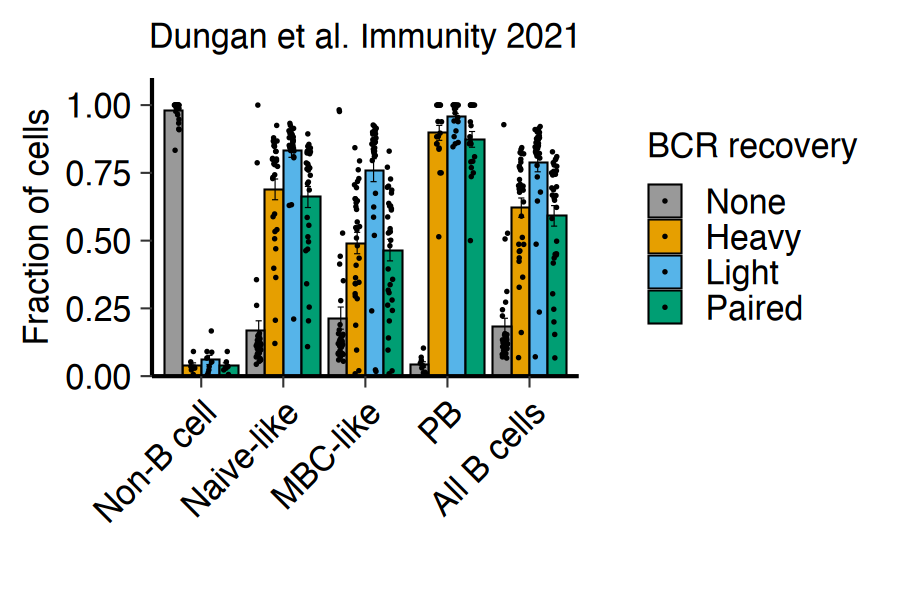

In [138]:
options(repr.plot.width=3,repr.plot.height=2,repr.plot.res=300)
dodgewidth=0.8
df4gg2 %>% 
ggplot(aes(x=cell.type,fill=recovery)) + theme_classic()+ 
geom_bar(aes(y=mean.frac),stat='identity', position='dodge', color = 'black', linewidth = .177) + 
geom_errorbar(aes(ymin = mean.frac-se.frac, ymax = mean.frac+se.frac),width=0.3,
              position = position_dodge(width = dodgewidth),linewidth=0.1)+
geom_point(data=df4gg, aes(x=cell.type, y=frac), size= .2, color = 'black',stroke=0.2,
           position = position_jitterdodge(dodge.width = dodgewidth, jitter.width = .2))+
#geom_jitter(aes(y=frac),size=0.5,position = position_dodge(width = 0.9)) + 
labs(title='Dungan et al. Immunity 2021',x='',y='Fraction of cells',fill='BCR recovery') + 
scale_fill_manual(values = c('None'="#999999", 'Heavy'="#E69F00", 'Light'="#56B4E9",'Paired'="#009E73")) +
scale_y_continuous(expand=c(0,0),lim=c(0,1.1)) + 
Axis_themes +
theme(axis.text.x=element_text(angle=45,hjust=1),
      legend.key.size = unit(.3, 'cm'))

out = 'figures/dungan_celltype_bcr_recovery_barplot.pdf'
ggsave(out, height = 2, width = 3, useDingbats = FALSE)

In [141]:
table(df4gg$cell.type,df4gg$recovery)

             
              None Heavy Light Paired
  Non-B cell    27     7     9      7
  Naive-like    31    30    30     30
  MBC-like      32    32    32     32
  PB             9    20    20     20
  All B cells   32    32    32     32

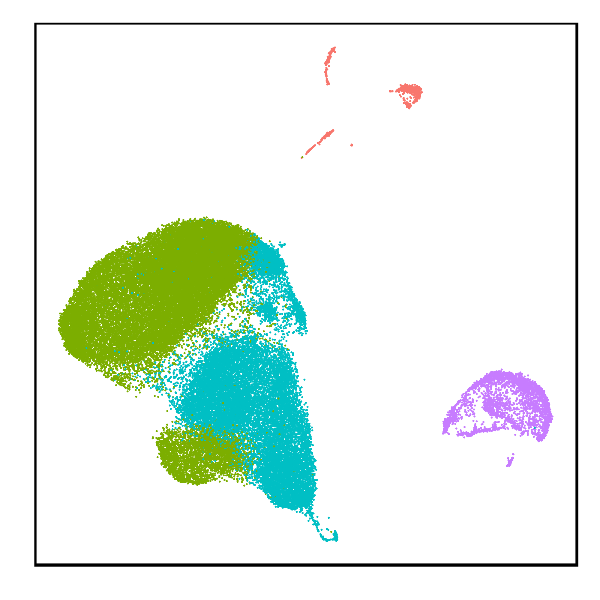

In [98]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)

metadata = read.csv('Dugan_etal_metadata_recovery_labeled.csv',row.names=1)
metadata$cell.type = factor(metadata$cell.type,levels=c('Non-B cell','Naive-like','MBC-like','PB'))

metadata %>% 
ggplot(aes(x=UMAP1, y=UMAP2,color=cell.type))+ 
geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) +
#scale_color_manual(values = c('#CCCCCB','#C8E3B4','#1D91C0','#1E2456')) +
labs(color='Cell Type') +
UMAP_theme

out = 'figures/dungan_uamp_celltype.pdf'
ggsave(out, height = 1.8, width = 1.8, useDingbats = FALSE)

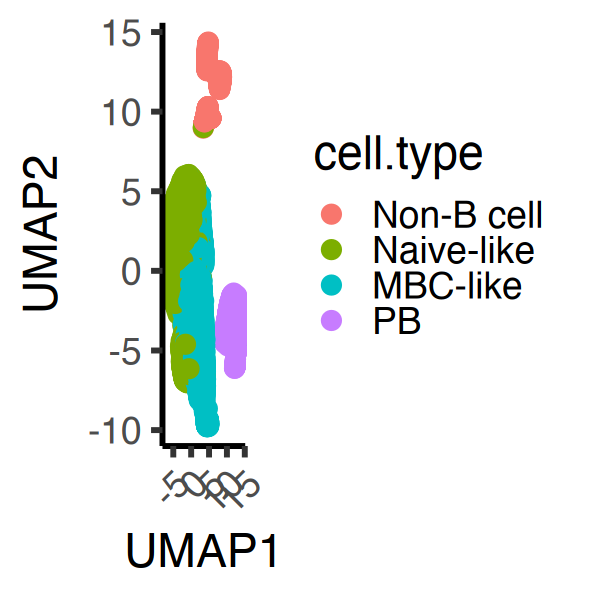

In [101]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)

metadata = read.csv('Dugan_etal_metadata_recovery_labeled.csv',row.names=1)
metadata$cell.type = factor(metadata$cell.type,levels=c('Non-B cell','Naive-like','MBC-like','PB'))

metadata %>% 
ggplot(aes(x=UMAP1, y=UMAP2,color=cell.type))+ theme_classic() +
geom_point() + #guides(color = guide_legend(ncol = 2)) +
theme(axis.text.x=element_text(angle=45,hjust=1),
      legend.key.size = unit(.3, 'cm'))

out = 'figures/dugan_uamp_celltype_legend.pdf'
ggsave(out, height = 1.8, width = 1.8, useDingbats = FALSE)

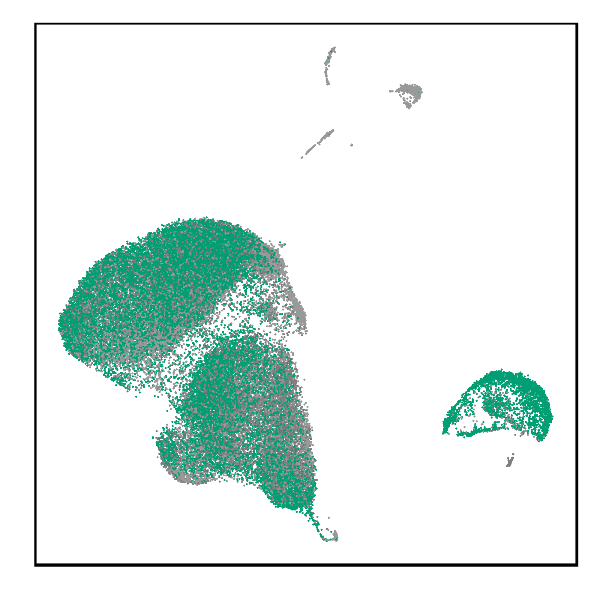

In [106]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)

metadata = read.csv('Dugan_etal_metadata_recovery_labeled.csv',row.names=1)

metadata %>% 
ggplot(aes(x=UMAP1, y=UMAP2,color=recovery))+ 
geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) +
scale_color_manual(values = c('None'="#999999", 'Heavy'="#E69F00", 'Light'="#56B4E9",'Paired'="#009E73")) +
labs(color='Cell Type') +
UMAP_theme

out = 'figures/dugan_uamp_recovery.pdf'
ggsave(out, height = 1.8, width = 1.8, useDingbats = FALSE)

In [118]:
# get WTA and BCR counts 
bcell = subset(gex,cell.type!='Non-B cell')
bcell

An object of class Seurat 
33694 features across 52313 samples within 1 assay 
Active assay: RNA (33694 features, 2000 variable features)
 73 layers present: counts.R125, counts.R3, counts.R478910, counts.R6, counts.S116, counts.S130, counts.S144, counts.S155, counts.S166, counts.S171, counts.S20, counts.S201, counts.S210, counts.S210V2, counts.S214, counts.S218, counts.S24, counts.S266, counts.S266V2, counts.S272, counts.S281, counts.S305, counts.S33, counts.S356, counts.S356V2, counts.S376, counts.S407, counts.S407V2, counts.S48, counts.S50, counts.S537, counts.S564, counts.S586, counts.S609, counts.S65, counts.S92, data.R125, data.R3, data.R478910, data.R6, data.S116, data.S130, data.S144, data.S155, data.S166, data.S171, data.S20, data.S201, data.S210, data.S210V2, data.S214, data.S218, data.S24, data.S266, data.S266V2, data.S272, data.S281, data.S305, data.S33, data.S356, data.S356V2, data.S376, data.S407, data.S407V2, data.S48, data.S50, data.S537, data.S564, data.S586, data.S609

In [119]:
# important step 
filter.bcr = bcr %>% filter(cell_id %in% keep$cell_id)

In [120]:
# get WTA and BCR counts 
DefaultAssay(bcell) <- "RNA"
# IGH
df4gg = FetchData(bcell,jz.checkgenes(bcell,'IGH'),slot='count')
df4gg$WTA = rowSums(df4gg)
# get scVDJ umis
bcr.df = filter.bcr %>% filter(umis>0,chain=='IGH')
df4gg$VDJ = bcr.df$umis[match(rownames(df4gg), bcr.df$cell_id)]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0
igh = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGH')

# IGK
df4gg = FetchData(bcell,jz.checkgenes(bcell,'IGK'),slot='count')
df4gg$WTA = rowSums(df4gg)
# get scVDJ umis
bcr.df = filter.bcr %>% filter(umis>0,chain=='IGK')
df4gg$VDJ = bcr.df$umis[match(rownames(df4gg), bcr.df$cell_id)]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0
igk = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGK')

# IGL
df4gg = FetchData(bcell,jz.checkgenes(bcell,'IGL'),slot='count')
df4gg$WTA = rowSums(df4gg)
# get scVDJ umis
bcr.df = filter.bcr %>% filter(umis>0,chain=='IGL')
df4gg$VDJ = bcr.df$umis[match(rownames(df4gg), bcr.df$cell_id)]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0
igl = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGL')

Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
“Ignoring unknown parameters: `yintercept`”
Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
“Ignoring unknown parameters: `yintercept`”
Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
“Ignoring unknown parameters: `yintercept`”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


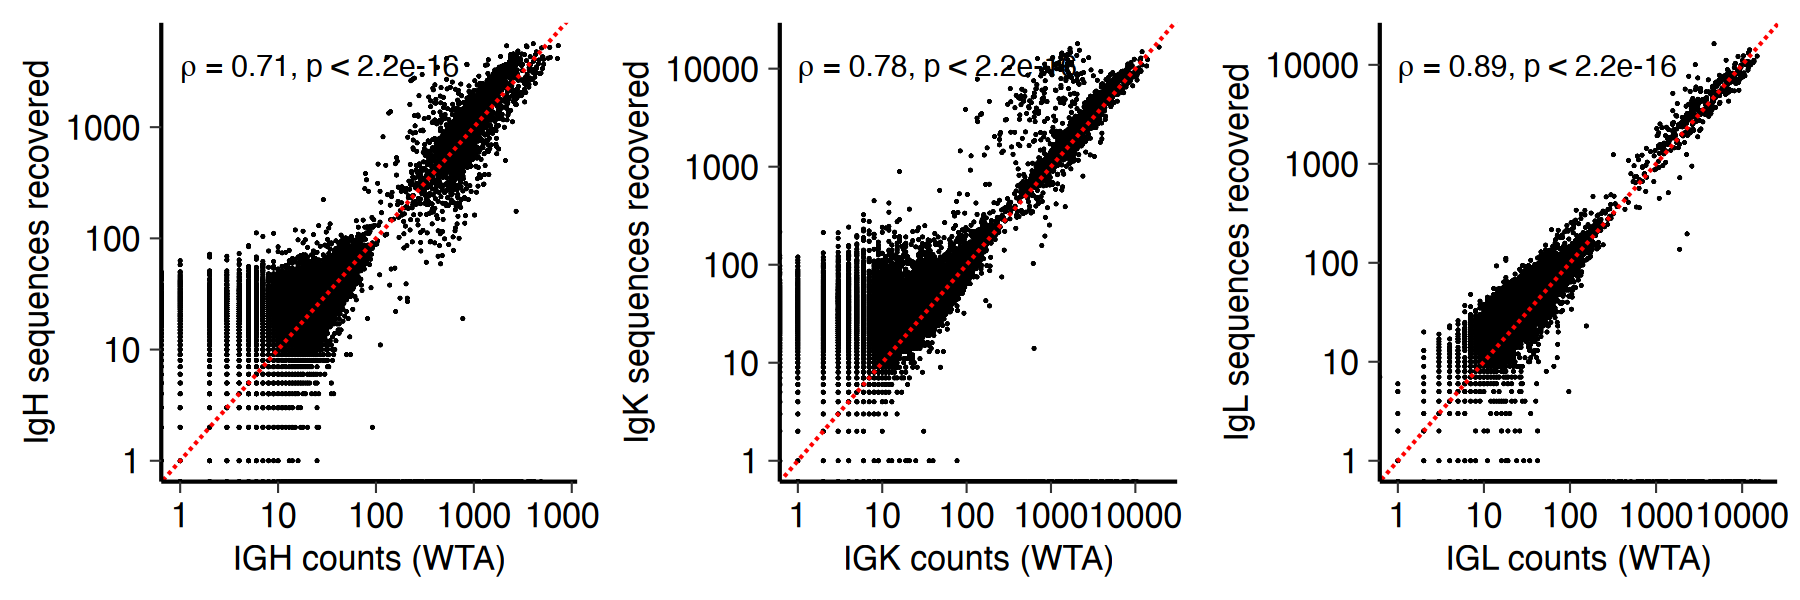

In [121]:
options(repr.plot.width = 6, repr.plot.height = 2, repr.plot.res = 300)

library(ggpubr)
g1 = ggplot(igh, aes(x = WTA, y = VDJ)) + geom_point_rast(size = .4, stroke = 0.1, raster.dpi = 1000) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes + labs(x = 'IGH counts (WTA)', y  = 'IgH sequences recovered') + stat_cor(data = igh %>% filter(WTA>1,VDJ>1),aes(x=WTA,y=VDJ),method = 'spearman', size = 2.5, cor.coef.name = 'rho')
g1$layers[[2]]$aes_params$textsize <- 3

g2 = ggplot(igk, aes(x = WTA, y = VDJ)) + geom_point_rast(size = .4, stroke = 0.1, raster.dpi = 1000) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes  + labs(x = 'IGK counts (WTA)', y  = 'IgK sequences recovered') + stat_cor(data = igk %>% filter(WTA>1,VDJ>1),aes(x=WTA,y=VDJ),method = 'spearman', size = 2.5, cor.coef.name = 'rho')
g2$layers[[2]]$aes_params$textsize <- 3

g3 = ggplot(igl, aes(x = WTA, y = VDJ)) + geom_point_rast(size = .4, stroke = 0.1, raster.dpi = 1000) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes  + labs(x = 'IGL counts (WTA)', y  = 'IgL sequences recovered') + stat_cor(data = igl %>% filter(WTA>1,VDJ>1),aes(x=WTA,y=VDJ),method = 'spearman', size = 2.5, cor.coef.name = 'rho')
g3$layers[[2]]$aes_params$textsize <- 3


cowplot::plot_grid(g1, g2, g3, ncol = 3)
# out = 'figures/10x_3p_corplots.pdf'
# ggsave(out,device='pdf', width = 6.7, height = 6.8/3,
#        dpi = 300,useDingbats = FALSE)

In [122]:
head(igh)

,WTA,VDJ,chain
,<dbl>,<dbl>,<chr>
R125_AAACGGGTCTCAACTT-1,6,0,IGH
R125_AAAGATGTCTCTTGAT-1,4842,3060,IGH
R125_AAAGCAACAATCCGAT-1,7,0,IGH
R125_AAAGCAACAGCGTTCG-1,8,0,IGH
R125_AAAGCAAGTACCATCA-1,9,0,IGH
R125_AAAGCAATCACTTCAT-1,2,0,IGH


In [125]:
out.df = rbind(igh,igk,igl) %>% 
mutate(exp=str_split_i(rownames(.),'_',1),
       project='10x 5`GEX - Dugan et al. 2021')
head(out.df)

,WTA,VDJ,chain,exp,project
,<dbl>,<dbl>,<chr>,<chr>,<chr>
R125_AAACGGGTCTCAACTT-1,6,0,IGH,R125,10x 5`GEX - Dugan et al. 2021
R125_AAAGATGTCTCTTGAT-1,4842,3060,IGH,R125,10x 5`GEX - Dugan et al. 2021
R125_AAAGCAACAATCCGAT-1,7,0,IGH,R125,10x 5`GEX - Dugan et al. 2021
R125_AAAGCAACAGCGTTCG-1,8,0,IGH,R125,10x 5`GEX - Dugan et al. 2021
R125_AAAGCAAGTACCATCA-1,9,0,IGH,R125,10x 5`GEX - Dugan et al. 2021
R125_AAAGCAATCACTTCAT-1,2,0,IGH,R125,10x 5`GEX - Dugan et al. 2021


In [126]:
table(out.df$chain)


  IGH   IGK   IGL 
52313 52313 52313 

In [127]:
write.csv(out.df,'Dugan_eta_cDNA_vs_VDJ.csv')

In [129]:
# recovery probability plot 
df4gg = read.csv('Dugan_eta_cDNA_vs_VDJ.csv',row.names=1)
df4gg = df4gg %>% mutate(chain=ifelse(chain == 'IGH', 'Heavy Chain', 'Light Chain')) %>%
mutate(Recovery = ifelse(VDJ>0, 'Recovery', 'No Recovery'))

## Binning the WTA counts
df4gg$WTA.bin = cut(df4gg$WTA, c(-Inf,0,2,4,8,16,32,64,Inf)) 
# calculate fraction of recovery / no recovery 
df4gg = df4gg %>%
group_by(chain, project, exp, WTA.bin, Recovery) %>% summarise(n=n()) %>% 
group_by(chain, project, exp, WTA.bin) %>% mutate(frac = n/sum(n))

# calculate mean for recovered 
df4gg = df4gg %>% filter(Recovery == 'Recovery') %>% 
group_by(chain,project,WTA.bin) %>% 
summarise(mean.frac = mean(frac), std = sd(frac), se = std/sqrt(n())) %>% ungroup()

`summarise()` has grouped output by 'chain', 'project', 'exp', 'WTA.bin'. You
can override using the `.groups` argument.
`summarise()` has grouped output by 'chain', 'project'. You can override using
the `.groups` argument.


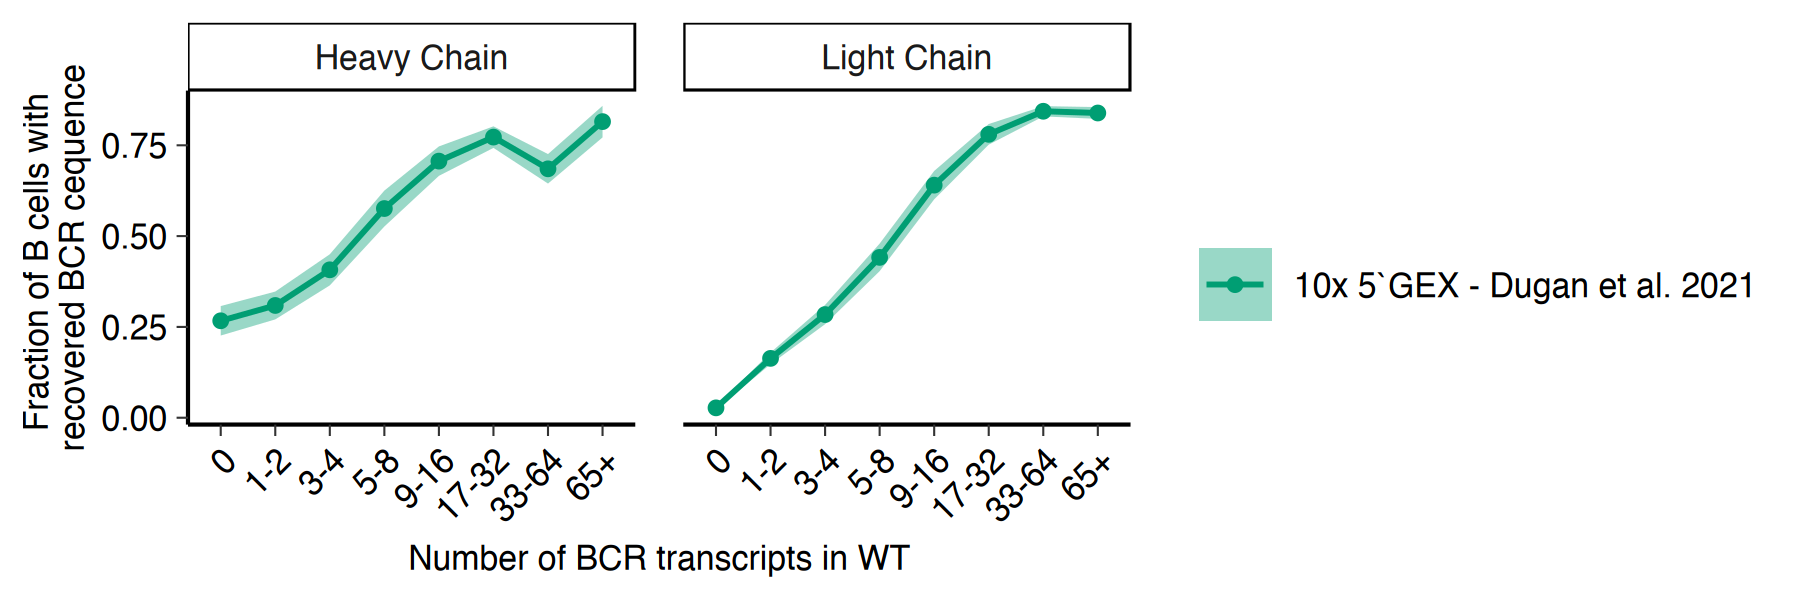

In [130]:
options(repr.plot.width=6, repr.plot.height=2, repr.plot.res=300)
col = c("#009E73", "#0072B2", "#999999", "#CC79A7" ,"#D55E00")#E69F00

df4gg %>% 
ggplot(aes(x=WTA.bin, y=mean.frac,color=project)) + theme_classic() +
geom_ribbon(aes(group=project,ymin=mean.frac-se, ymax=mean.frac+se, fill=project), linewidth=0, alpha=0.4)+
geom_line(aes(group=project),linewidth=0.5) +
geom_point(size=1) + 
scale_color_manual(values=col) +
scale_fill_manual(values=col) +
scale_x_discrete(labels=c('0','1-2','3-4','5-8','9-16','17-32','33-64','65+'))+ 
facet_wrap('chain') + 
labs(y='Fraction of B cells with \nrecovered BCR cequence', 
     x='Number of BCR transcripts in WT',color='', fill='')+
Axis_themes+
theme(panel.spacing = unit(0.8, "lines"),
      axis.text.x=element_text(angle=45,hjust=1,color = "black"))



# Play Ground 

In [23]:
samples[startsWith(samples,'R')]

[1] "R125"    "R3"      "R478910" "R6"

In [33]:
samples = list.files('Gene Expression and Antibody Capture/')
samples = samples[!startsWith(samples,'R')]

for (curr.sample in samples) {
    gex.dir = paste0('Gene Expression and Antibody Capture/',curr.sample)
    
    mtx = Read10X(data.dir = gex.dir)
    gex = CreateSeuratObject(counts = mtx$`Gene Expression`,project= curr.sample)
    
    # add sample name before cell id
    gex$cell_id = paste(curr.sample,rownames(gex@meta.data),sep='_')
    
    if (curr.sample == samples[1]) {
        out.gex = gex
    } else {
        out.gex = merge(out.gex,gex,add.cell.ids=c('old','new'))
    }
}
rownames(out.gex@meta.data) = out.gex$cell_id
colnames(out.gex) = out.gex$cell_id

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains mo

In [38]:
table(out.gex$orig.ident)


  S116   S130   S144   S155   S166   S171    S20   S201   S210 S210V2   S214 
  3909   1082   2693   4433   2797   2323    293   1159   1673   2407    366 
  S218    S24   S266 S266V2   S272   S281   S305    S33   S356 S356V2   S376 
  1332   1741   1915    388   1525    525   1659   1646    891   3448   3452 
  S407 S407V2    S48    S50   S537   S564   S586   S609    S65    S92 
  1334    572    911    725   2074    325   3534    735   3535   2535 

In [41]:
mtx.r125 = Read10X(data.dir = 'Gene Expression and Antibody Capture/R125/')
mtx.r3 = Read10X(data.dir = 'Gene Expression and Antibody Capture/R3/')
mtx.r478910 = Read10X(data.dir = 'Gene Expression and Antibody Capture/R478910/')
mtx.r6 = Read10X(data.dir = 'Gene Expression and Antibody Capture/R6/')


10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [42]:
# hard code R sampels because they are hashed 
r125 = CreateSeuratObject(counts = mtx.r125$`Gene Expression`,project= 'R125')
r3 = CreateSeuratObject(counts = mtx.r3$`Gene Expression`,project= 'R3')
r478910 = CreateSeuratObject(counts = mtx.r478910$`Gene Expression`,project= 'R478910')
r6 = CreateSeuratObject(counts = mtx.r6$`Gene Expression`,project= 'R6')


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [49]:
# locate hashing counts
name.list = rownames(mtx.r6$`Antibody Capture`)
grep(paste0("^", 'Hash'), name.list)

[1] 18 19

In [50]:
# get the hash counts
hash.r125 = CreateAssayObject(counts = mtx.r125$`Antibody Capture`[c(18:20),])
hash.r3 = CreateAssayObject(counts = mtx.r3$`Antibody Capture`[c(18:19),])
hash.r478910 = CreateAssayObject(counts = mtx.r478910$`Antibody Capture`[c(18:22),])
hash.r6 = CreateAssayObject(counts = mtx.r6$`Antibody Capture`[c(18:19),])


In [51]:
# add hashing to seurat 
r125[['Hashing']] = hash.r125
r3[['Hashing']] = hash.r3
r478910[['Hashing']] = hash.r478910
r6[['Hashing']] = hash.r6

In [52]:
r125 <- NormalizeData(r125, assay = "Hashing", normalization.method = "CLR", margin = 2)
r3 <- NormalizeData(r3, assay = "Hashing", normalization.method = "CLR", margin = 2)
r478910 <- NormalizeData(r478910, assay = "Hashing", normalization.method = "CLR", margin = 2)
r6 <- NormalizeData(r6, assay = "Hashing", normalization.method = "CLR", margin = 2)

r125 <- HTODemux(r125, assay = "Hashing", positive.quantile = 0.99)
r3 <- HTODemux(r3, assay = "Hashing", positive.quantile = 0.99)
r478910 <- HTODemux(r478910, assay = "Hashing", positive.quantile = 0.99)
r6 <- HTODemux(r6, assay = "Hashing", positive.quantile = 0.99)


Normalizing across cells

Normalizing across cells

Normalizing across cells

Normalizing across cells

Cutoff for Hashtag1-R1 : 49 reads

Cutoff for Hashtag2-R2 : 82 reads

Cutoff for Hashtag3-R5 : 103 reads

Cutoff for Hashtag1-early : 95 reads

Cutoff for Hashtag2-late : 30 reads

Cutoff for Hashtag1-R4 : 20 reads

Cutoff for Hashtag2-R7 : 34 reads

Cutoff for Hashtag3-R8 : 44 reads

Cutoff for Hashtag4-R9 : 242 reads

Cutoff for Hashtag5-R10 : 54 reads

Cutoff for Hashtag3-early : 30 reads

Cutoff for Hashtag4-late : 15 reads



In [60]:
gex.r = merge(r125,y=c(r3,r478910,r6),add.cell.ids = c("r125", "r3", "r478910",'r6'))
gex.r$cell_id = rownames(gex.r@meta.data)


In [62]:
table(gex.r$orig.ident,gex.r$Hashing_classification.global)

         
          Doublet Negative Singlet
  R125         74      291    1014
  R3           47      173     905
  R478910     276     1086    3210
  R6            7      393     194

In [63]:
gex.r = subset(gex.r,subset=Hashing_classification.global=="Singlet")

In [64]:
table(gex.r$orig.ident,gex.r$Hashing_classification.global)

         
          Singlet
  R125       1014
  R3          905
  R478910    3210
  R6          194

In [66]:
gex.all = merge(x=out.gex,y=gex.r)

ERROR: Error in names(new.idents) <- rownames(x = combined.meta.data): 'names' attribute [121197] must be the same length as the vector [63260]


In [68]:
out.gex
gex.r

An object of class Seurat 
33694 features across 57937 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)

An object of class Seurat 
33706 features across 5323 samples within 2 assays 
Active assay: RNA (33694 features, 0 variable features)
 1 other assay present: Hashing

In [74]:
colnames(gex.r) %>% head()

[1] "r125_AAACGGGCATGCTGGC-1" "r125_AAACGGGTCTCAACTT-1"
[3] "r125_AAAGATGTCTCTTGAT-1" "r125_AAAGCAACAATCCGAT-1"
[5] "r125_AAAGCAACACCGTTGG-1" "r125_AAAGCAACAGCGTTCG-1"

In [ ]:
for (curr.sample in samples) {
    bcr.dir = paste0('BCR/',curr.sample,'/filtered_contig_annotations.csv')

}


In [21]:
mtx = Read10X(data.dir = 'Gene Expression and Antibody Capture/R6/')
str(mtx)

10X data contains more than one type and is being returned as a list containing matrices of each type.



List of 2
 $ Gene Expression :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:294635] 33 45 49 72 77 101 110 153 188 197 ...
  .. ..@ p       : int [1:595] 0 1122 1287 1508 1764 4960 6661 7321 7787 8047 ...
  .. ..@ Dim     : int [1:2] 33694 594
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:33694] "RP11-34P13.3" "FAM138A" "OR4F5" "RP11-34P13.7" ...
  .. .. ..$ : chr [1:594] "AAAGATGTCACAGTAC-1" "AAAGTAGGTTCTGTTT-1" "AAAGTAGTCGGATGTT-1" "AAATGCCAGTGCCATT-1" ...
  .. ..@ x       : num [1:294635] 1 1 1 1 1 1 1 4 3 2 ...
  .. ..@ factors : list()
 $ Antibody Capture:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:6400] 0 1 4 8 9 11 15 17 18 0 ...
  .. ..@ p       : int [1:595] 0 9 20 30 42 52 62 74 83 99 ...
  .. ..@ Dim     : int [1:2] 19 594
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:19] "Probe51-SPIKE-229E-NL63" "Probe52-SPIKE-HKU1-OC43" "Probe53-NP-229E-NL63" "Probe54-NP-HKU1-OC43" ...
  .. .. ..$ : chr [1:5

In [22]:
mtx$`Antibody Capture`

   [[ suppressing 594 column names ‘AAAGATGTCACAGTAC-1’, ‘AAAGTAGGTTCTGTTT-1’, ‘AAAGTAGTCGGATGTT-1’ ... ]]



19 x 594 sparse Matrix of class "dgCMatrix"
                                                                               
Probe51-SPIKE-229E-NL63    1  2  .  1  1   1  .  .  11  15   2  1  1  1   1   4
Probe52-SPIKE-HKU1-OC43 2704  3  3 26  5 281  3  4  26  14 211  8  4 62   2   5
Probe53-NP-229E-NL63       .  .  1  .  .   .  .  .   2   1   .  .  .  .   .   1
Probe54-NP-HKU1-OC43       .  .  1  1  .   1  1  1  10   7   1  .  .  .   .   .
Probe55-HA-H3Singapore     2  2  1  4  .   .  1  4   2   6   .  .  1  .   1   .
Probe61-HA-H3Kansas        .  .  .  1  .   1  .  .   1   2   .  2  .  .   .   .
Probe62-IFN-omega          .  .  1  1  1   .  .  1   1   .   .  .  .  .   .   .
Probe63-EMPTY-PE           .  3  2  1  1   .  3  .   2  10   1  2  4  .   .   .
Probe71-RBD-229E-NL63      8  7  7 40  4   3 13  5  25  22   4 17  2  3   2  13
Probe72-RBD-HKU1-OC43      5  6  7 12  6   5  5  4  26  45   5  6  6  3   1   8
Probe73-RBD-SARS2          .  .  .  1  .   .  .  .   .   1   .  .  .  .   . 

In [18]:
# Read in matrix 
mtx = Read10X(data.dir = 'Gene Expression and Antibody Capture/S92/')

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [19]:
str(mtx)

List of 2
 $ Gene Expression :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1644347] 153 176 188 305 406 436 440 484 550 556 ...
  .. ..@ p       : int [1:2536] 0 640 994 1879 2367 2928 3511 4057 4363 5203 ...
  .. ..@ Dim     : int [1:2] 33694 2535
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:33694] "RP11-34P13.3" "FAM138A" "OR4F5" "RP11-34P13.7" ...
  .. .. ..$ : chr [1:2535] "AAACCTGCATGGGACA-1" "AAACCTGGTGTATGGG-1" "AAACCTGTCTGTTTGT-1" "AAACGGGAGTGCCATT-1" ...
  .. ..@ x       : num [1:1644347] 4 1 2 2 1 2 1 16 2 1 ...
  .. ..@ factors : list()
 $ Antibody Capture:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:24766] 0 1 2 3 4 5 6 7 8 9 ...
  .. ..@ p       : int [1:2536] 0 10 20 30 40 49 59 69 79 88 ...
  .. ..@ Dim     : int [1:2] 10 2535
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:10] "Probe51_Spike" "Probe52_RBD" "Probe53_OFR7" "Probe54_ORF8" ...
  .. .. ..$ : chr [1:2535] "AAACCTGCATGGGACA-1" "AA

In [20]:
mtx$`Antibody Capture`

   [[ suppressing 2535 column names ‘AAACCTGCATGGGACA-1’, ‘AAACCTGGTGTATGGG-1’, ‘AAACCTGTCTGTTTGT-1’ ... ]]



10 x 2535 sparse Matrix of class "dgCMatrix"
                                                                               
Probe51_Spike  18  53  44  5  1  19  6   2   . 45  27  30  21   9  48 3  38  10
Probe52_RBD     8  50  55  3  3  10 12   4   1  7   4  61  24   4  20 3  37  14
Probe53_OFR7   11  23  15  1  .   7  5   2   1  1   2  14  11   4   9 .  13   6
Probe54_ORF8    7  26  48  2 73   3  7   2  51  .   1  13  11  20  10 .  11   8
Probe55_NP     24  56  57  5  1  15  9  10   4  3   5  59  42  13  25 3  58  33
CD62L          55 148 228 13 36 161 58  10 488  9 447 135 180  21 232 4 127 195
CD27.1         43 120 129 11  6  61  9   7   6  6  14 156  63   5 236 3 121  48
CD73          106 472 337 23 34 182 21  16  28 16  23 292 203  49 456 9 252 147
HLA-DR         89 233 239 19 33 146  5 211  27 22  32 207 166 143 428 9 185 113
CD80.1         38  95 119  5  4  56  3  11  13  7   3 150  61   8 207 3  97  34
                                                                           

In [6]:
hash.mtx = CreateAssayObject(counts = mtx$`Antibody Capture`[c(18:20),])


In [7]:
srat <- CreateSeuratObject(counts = mtx$`Gene Expression`,project='R125')


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [8]:
srat

An object of class Seurat 
33694 features across 1379 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)